Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

In the dataset below, the following steps have been performed:

1. Data Preprocessing:

* Managed outliers
* Addressed missing values.
* Handled potential duplicates.

2. Exploratory Data Analysis (EDA):

* Conducted a thorough analysis to identify patterns and relationships within the data.

3. Customer-Centric Feature Engineering (CRM Analytics):

* Created Recency, Frequency, and Monetary (RFM) values for customer transaction insights.
* Analyzed unique product purchase details.
* Derived RFM scores to segment customers based on activity levels.

4. Additional Customer-Centric Features:

* Calculated average days between purchases.
* Identified preferred shopping days.
* Determined peak shopping hours.

This comprehensive analysis provides a holistic understanding of customer behavior and purchasing patterns.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset to return the features and rows inside the dataset

In [ ]:
df = pd.read_csv("Ecom_CRM_analysis.csv", encoding='ISO-8859-1')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Dataset Overview: Structure, Data Types, and Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Missing Values Summary: Count of Null Values per Column

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Removing Rows with Missing CustomerID Values and Resetting the Index

In [ ]:
df = df.dropna(subset = ['CustomerID']).reset_index(drop = True)

Rechecking and making sure that all rows with null values have been dropped

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


 Removing Duplicate Rows While Keeping the First Occurrence

In [ ]:
df = df.drop_duplicates(keep='first')

 Unique number of values for specific categorical columns


In [ ]:
columns_list = df[['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']]

for column in columns_list:
  unique_count = columns_list[column].nunique()
  print(column, "-", unique_count)


InvoiceNo - 22190
StockCode - 3684
Description - 3896
CustomerID - 4372
Country - 37


Finding the sale value for each individual product sold

In [ ]:
df['total'] = (df['Quantity'] * df['UnitPrice']).round(3)

Top 20 Highest Quantity demanded products in terms of Quantity, sales value

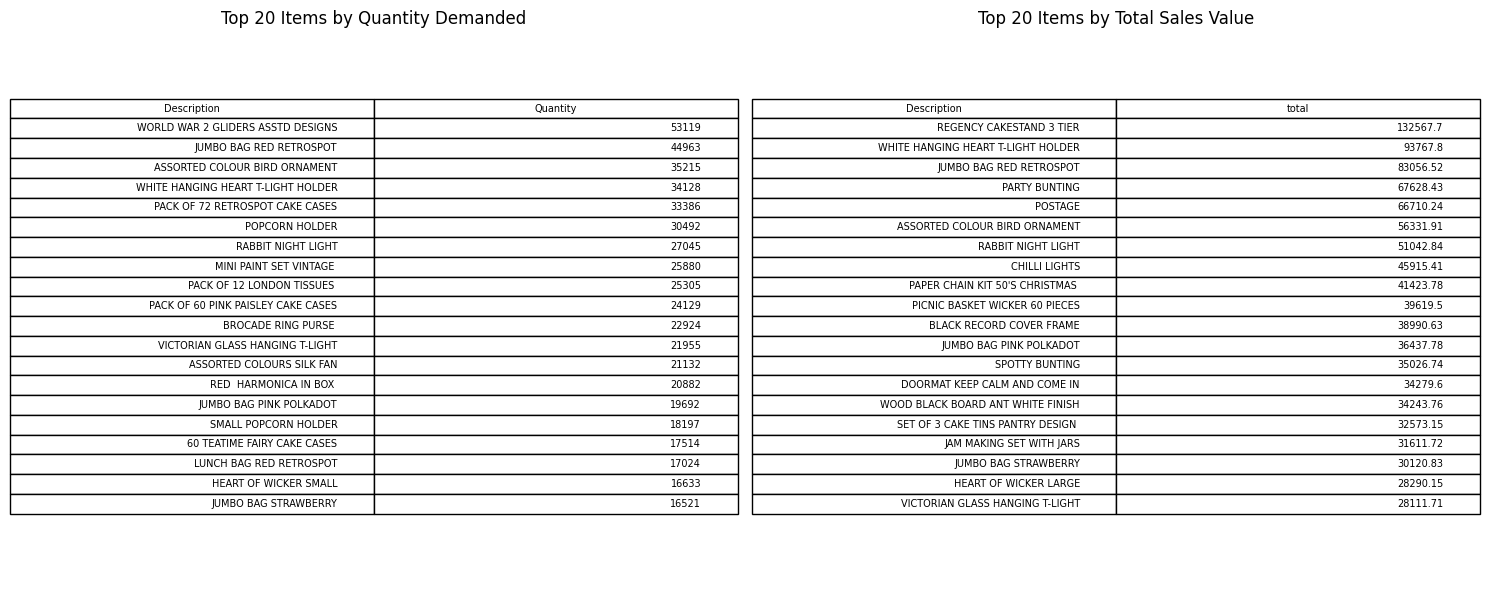

In [ ]:
highest_qty_demanded = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
highest_sales_value = df.groupby('Description')['total'].sum().sort_values(ascending=False).head(20).round(3)

# Create a figure with subplots for side-by-side display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

ax1.axis('off')
ax2.axis('off')

# Add tables to each subplot
ax1.table(cellText=highest_qty_demanded.reset_index().values, colLabels=highest_qty_demanded.reset_index().columns, loc='center')
ax1.set_title("Top 20 Items by Quantity Demanded")

ax2.table(cellText=highest_sales_value.reset_index().values, colLabels=highest_sales_value.reset_index().columns, loc='center')
ax2.set_title("Top 20 Items by Total Sales Value")

# Display the tables
plt.tight_layout()
plt.show()

Top 10 highest countries in terms of Quantity demand, Total sales value

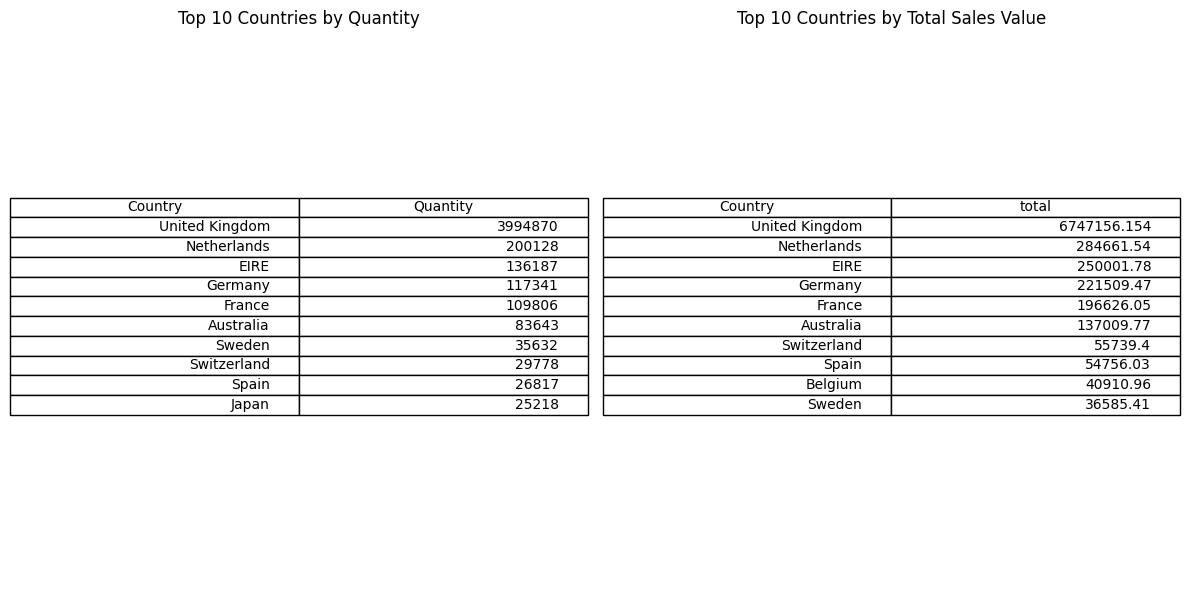

In [ ]:
# Calculate the top 10 countries by quantity and total sales value
top_countries_qty = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
top_countries_sales = df.groupby('Country')['total'].sum().sort_values(ascending=False).head(10).round(3)

# Create a figure with subplots for side-by-side display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns, adjust figure size as needed

# Remove axes for both subplots
ax1.axis('off')
ax2.axis('off')

# Add tables to each subplot
ax1.table(cellText=top_countries_qty.reset_index().values, colLabels=top_countries_qty.reset_index().columns, loc='center')
ax1.set_title("Top 10 Countries by Quantity")

ax2.table(cellText=top_countries_sales.reset_index().values, colLabels=top_countries_sales.reset_index().columns, loc='center')
ax2.set_title("Top 10 Countries by Total Sales Value")

# Display the tables
plt.tight_layout()
plt.show()


Total Monthly Sales Overview

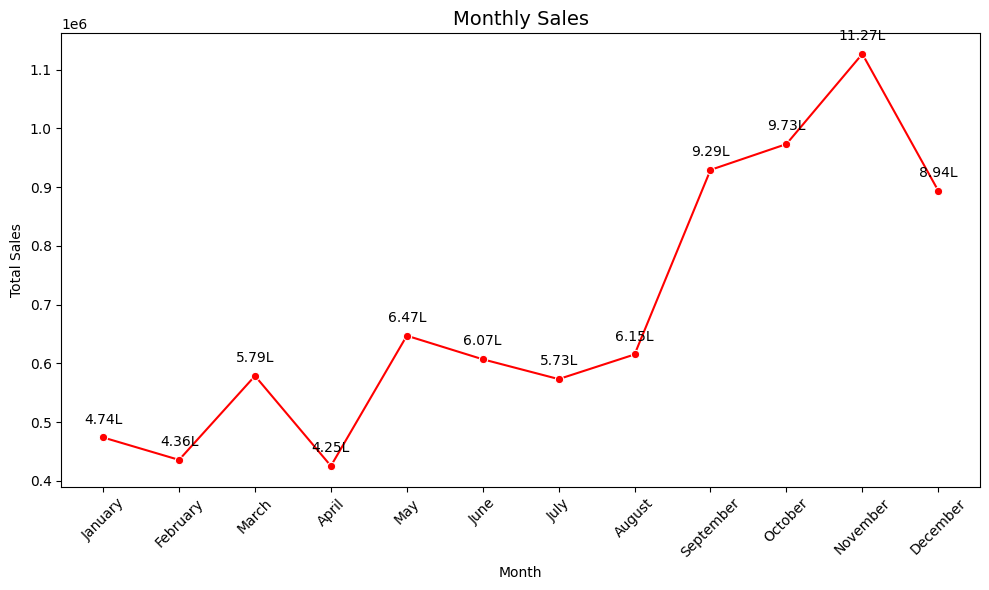

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the month names to a categorical type with the correct order
monthly_sales = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.month_name())['total'].sum()
monthly_sales = monthly_sales.reindex(month_order)  # Sort by the defined month order

# Function to format numbers in thousands (K) and lakhs (L)
def format_sales(value):
    if value >= 1_00_000:  # 1 Lakh
        return f'{value/1_00_000:.2f}L'  # Format in lakhs
    elif value >= 1_000:  # 1 Thousand
        return f'{value/1_000:.2f}K'  # Format in thousands
    else:
        return f'{value:.2f}'

# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='r')

# Annotate the points with values
for i, value in enumerate(monthly_sales.values):
    plt.annotate(format_sales(value),  # Format the value
                 (monthly_sales.index[i], value),  # Position (x, y)
                 textcoords="offset points",  # Offset for better placement
                 xytext=(0, 10),  # Move the text 10 points above the point
                 ha='center', fontsize=10, color='black')  # Align center, set font size and color

# Set the title and labels
plt.title('Monthly Sales', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


Extracting first purchase & last purchase date, calculating total number of purchases and total monetary value for each customer.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

monetary_table = df.groupby('CustomerID').agg(
    first_purchase_date = pd.NamedAgg(column = 'InvoiceDate', aggfunc = 'min'),
    last_purchase_date = pd.NamedAgg(column = 'InvoiceDate', aggfunc = 'max'),
    num_purchases = pd.NamedAgg(column = 'InvoiceNo', aggfunc = 'nunique'),
    country = pd.NamedAgg(column='Country', aggfunc='first'),
    monetary = pd.NamedAgg(column = 'total', aggfunc = 'sum')).reset_index()

monetary_table['first_purchase_date'] = pd.to_datetime(monetary_table['first_purchase_date']).dt.date
monetary_table['last_purchase_date'] = pd.to_datetime(monetary_table['last_purchase_date']).dt.date

monetary_table

,CustomerID,first_purchase_date,last_purchase_date,num_purchases,country,monetary
0,12346.0,2011-01-18,2011-01-18,2,United Kingdom,0.00
1,12347.0,2010-12-07,2011-12-07,7,Iceland,4310.00
2,12348.0,2010-12-16,2011-09-25,4,Finland,1797.24
3,12349.0,2011-11-21,2011-11-21,1,Italy,1757.55
4,12350.0,2011-02-02,2011-02-02,1,Norway,334.40
...,...,...,...,...,...,...
4367,18280.0,2011-03-07,2011-03-07,1,United Kingdom,180.60
4368,18281.0,2011-06-12,2011-06-12,1,United Kingdom,80.82
4369,18282.0,2011-08-05,2011-12-02,3,United Kingdom,176.60
4370,18283.0,2011-01-06,2011-12-06,16,United Kingdom,2045.53


Calculating key metrics like recency and frequency for each unique customer

In [ ]:
reference_date = monetary_table['last_purchase_date'].max()

monetary_table['recency'] = (pd.to_datetime(reference_date) - pd.to_datetime(monetary_table['last_purchase_date'])).dt.days


In [ ]:
monetary_table['first_purchase_date'] = pd.to_datetime(monetary_table['first_purchase_date'])
monetary_table['last_purchase_date'] = pd.to_datetime(monetary_table['last_purchase_date'])

monetary_table['months_cust'] = ((monetary_table['last_purchase_date'].dt.year - monetary_table['first_purchase_date'].dt.year)*12
                                 +(monetary_table['last_purchase_date'].dt.month - monetary_table['first_purchase_date'].dt.month)) + 1


monetary_table['frequency'] = monetary_table['num_purchases']/monetary_table['months_cust']

RFM_table = monetary_table.sort_values(by = 'CustomerID')

RFM_table

,CustomerID,first_purchase_date,last_purchase_date,num_purchases,country,monetary,recency,months_cust,frequency
0,12346.0,2011-01-18,2011-01-18,2,United Kingdom,0.00,325,1,2.000000
1,12347.0,2010-12-07,2011-12-07,7,Iceland,4310.00,2,13,0.538462
2,12348.0,2010-12-16,2011-09-25,4,Finland,1797.24,75,10,0.400000
3,12349.0,2011-11-21,2011-11-21,1,Italy,1757.55,18,1,1.000000
4,12350.0,2011-02-02,2011-02-02,1,Norway,334.40,310,1,1.000000
...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07,2011-03-07,1,United Kingdom,180.60,277,1,1.000000
4368,18281.0,2011-06-12,2011-06-12,1,United Kingdom,80.82,180,1,1.000000
4369,18282.0,2011-08-05,2011-12-02,3,United Kingdom,176.60,7,5,0.600000
4370,18283.0,2011-01-06,2011-12-06,16,United Kingdom,2045.53,3,12,1.333333


Determining quintiles for each RFM metric

In [ ]:

# Define the percentile values you need
percentile_values = [20, 40, 60, 80, 100]
quantiles = [p / 100 for p in percentile_values]  # Convert to fractions

# Calculate the percentiles for each metric
monetary_percentiles = RFM_table['monetary'].quantile(quantiles)
frequency_percentiles = RFM_table['frequency'].quantile(quantiles)
recency_percentiles = RFM_table['recency'].quantile(quantiles)

# Assign percentile values to new columns
RFM_table['m20'] = monetary_percentiles[0.2]
RFM_table['m40'] = monetary_percentiles[0.4]
RFM_table['m60'] = monetary_percentiles[0.6]
RFM_table['m80'] = monetary_percentiles[0.8]
RFM_table['m100'] = monetary_percentiles[1.0]

RFM_table['f20'] = frequency_percentiles[0.2]
RFM_table['f40'] = frequency_percentiles[0.4]
RFM_table['f60'] = frequency_percentiles[0.6]
RFM_table['f80'] = frequency_percentiles[0.8]
RFM_table['f100'] = frequency_percentiles[1.0]

RFM_table['r20'] = recency_percentiles[0.2]
RFM_table['r40'] = recency_percentiles[0.4]
RFM_table['r60'] = recency_percentiles[0.6]
RFM_table['r80'] = recency_percentiles[0.8]
RFM_table['r100'] = recency_percentiles[1.0]

# Sort the RFM_table by CustomerID (optional)
RFM_table = RFM_table.sort_values('CustomerID')

# Display all columns
pd.set_option('display.max_columns', None)
RFM_table


,CustomerID,first_purchase_date,last_purchase_date,num_purchases,country,monetary,recency,months_cust,frequency,m20,m40,m60,m80,m100,f20,f40,f60,f80,f100,r20,r40,r60,r80,r100
0,12346.0,2011-01-18,2011-01-18,2,United Kingdom,0.00,325,1,2.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
1,12347.0,2010-12-07,2011-12-07,7,Iceland,4310.00,2,13,0.538462,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
2,12348.0,2010-12-16,2011-09-25,4,Finland,1797.24,75,10,0.400000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
3,12349.0,2011-11-21,2011-11-21,1,Italy,1757.55,18,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
4,12350.0,2011-02-02,2011-02-02,1,Norway,334.40,310,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07,2011-03-07,1,United Kingdom,180.60,277,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
4368,18281.0,2011-06-12,2011-06-12,1,United Kingdom,80.82,180,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
4369,18282.0,2011-08-05,2011-12-02,3,United Kingdom,176.60,7,5,0.600000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0
4370,18283.0,2011-01-06,2011-12-06,16,United Kingdom,2045.53,3,12,1.333333,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0


Assigning scores for each RFM metric

In [ ]:

def assign_monetary_score(row):
    if row['monetary'] <= row['m20']:
        return 1
    elif row['monetary'] <= row['m40']:
        return 2
    elif row['monetary'] <= row['m60']:
        return 3
    elif row['monetary'] <= row['m80']:
        return 4
    else:
        return 5

def assign_frequency_score(row):
    if row['frequency'] <= row['f20']:
        return 1
    elif row['frequency'] <= row['f40']:
        return 2
    elif row['frequency'] <= row['f60']:
        return 3
    elif row['frequency'] <= row['f80']:
        return 4
    else:
        return 5

def assign_recency_score(row):
    # Reversed scoring for recency
    if row['recency'] <= row['r20']:
        return 5
    elif row['recency'] <= row['r40']:
        return 4
    elif row['recency'] <= row['r60']:
        return 3
    elif row['recency'] <= row['r80']:
        return 2
    else:
        return 1

# Apply the functions to create the m_score, f_score, and r_score columns
RFM_table['m_score'] = RFM_table.apply(assign_monetary_score, axis=1)
RFM_table['f_score'] = RFM_table.apply(assign_frequency_score, axis=1)
RFM_table['r_score'] = RFM_table.apply(assign_recency_score, axis=1)

# Calculate the fm_score as the average of m_score and f_score, and cast to integer
RFM_table['fm_score'] = ((RFM_table['m_score'] + RFM_table['f_score']) / 2).round(0).astype(int)

# Select the desired columns to display
final_columns = ['CustomerID', 'm_score', 'f_score', 'r_score', 'recency', 'frequency', 'monetary', 'fm_score']

# Display the final result
final_RFM_table = RFM_table[final_columns]

# Display the final RFM table with scores
final_RFM_table


,CustomerID,m_score,f_score,r_score,recency,frequency,monetary,fm_score
0,12346.0,1,5,1,325,2.000000,0.00,3
1,12347.0,5,2,5,2,0.538462,4310.00,4
2,12348.0,4,1,2,75,0.400000,1797.24,2
3,12349.0,4,3,4,18,1.000000,1757.55,4
4,12350.0,2,3,1,310,1.000000,334.40,2
...,...,...,...,...,...,...,...,...
4367,18280.0,1,3,1,277,1.000000,180.60,2
4368,18281.0,1,3,1,180,1.000000,80.82,2
4369,18282.0,1,2,5,7,0.600000,176.60,2
4370,18283.0,5,5,5,3,1.333333,2045.53,5


Defining the RFM segements using these scores

In [ ]:

# Define a function to assign RFM segments
def assign_rfm_segment(row):
    if (row['r_score'] == 5 and row['fm_score'] == 5) or \
       (row['r_score'] == 5 and row['fm_score'] == 4) or \
       (row['r_score'] == 4 and row['fm_score'] == 5):
        return 'Champions'
    elif (row['r_score'] == 5 and row['fm_score'] == 3) or \
         (row['r_score'] == 4 and row['fm_score'] == 4) or \
         (row['r_score'] == 3 and row['fm_score'] == 5) or \
         (row['r_score'] == 3 and row['fm_score'] == 4):
        return 'Loyal Customers'
    elif (row['r_score'] == 5 and row['fm_score'] == 2) or \
         (row['r_score'] == 4 and row['fm_score'] == 2) or \
         (row['r_score'] == 3 and row['fm_score'] == 3) or \
         (row['r_score'] == 4 and row['fm_score'] == 3):
        return 'Potential Loyalists'
    elif row['r_score'] == 5 and row['fm_score'] == 1:
        return 'Recent Customers'
    elif (row['r_score'] == 4 and row['fm_score'] == 1) or \
         (row['r_score'] == 3 and row['fm_score'] == 1):
        return 'Promising'
    elif (row['r_score'] == 3 and row['fm_score'] == 2) or \
         (row['r_score'] == 2 and row['fm_score'] == 3) or \
         (row['r_score'] == 2 and row['fm_score'] == 2):
        return 'Customers Needing Attention'
    elif row['r_score'] == 2 and row['fm_score'] == 1:
        return 'About to Sleep'
    elif (row['r_score'] == 2 and row['fm_score'] == 5) or \
         (row['r_score'] == 2 and row['fm_score'] == 4) or \
         (row['r_score'] == 1 and row['fm_score'] == 3):
        return 'At Risk'
    elif (row['r_score'] == 1 and row['fm_score'] == 5) or \
         (row['r_score'] == 1 and row['fm_score'] == 4):
        return 'Cant Lose Them'
    elif row['r_score'] == 1 and row['fm_score'] == 2:
        return 'Hibernating'
    elif row['r_score'] == 1 and row['fm_score'] == 1:
        return 'Lost'
    else:
        return 'Unknown'  # Default case, in case no conditions match

# Apply the function to create the RFM segment column
RFM_table['rfm_segment'] = RFM_table.apply(assign_rfm_segment, axis=1)

# Sort by CustomerID (optional)
RFM_table = RFM_table.sort_values(by='CustomerID')


RFM_table

,CustomerID,first_purchase_date,last_purchase_date,num_purchases,country,monetary,recency,months_cust,frequency,m20,m40,m60,m80,m100,f20,f40,f60,f80,f100,r20,r40,r60,r80,r100,m_score,f_score,r_score,fm_score,rfm_segment
0,12346.0,2011-01-18,2011-01-18,2,United Kingdom,0.00,325,1,2.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,5,1,3,At Risk
1,12347.0,2010-12-07,2011-12-07,7,Iceland,4310.00,2,13,0.538462,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,5,2,5,4,Champions
2,12348.0,2010-12-16,2011-09-25,4,Finland,1797.24,75,10,0.400000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,4,1,2,2,Customers Needing Attention
3,12349.0,2011-11-21,2011-11-21,1,Italy,1757.55,18,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,4,3,4,4,Loyal Customers
4,12350.0,2011-02-02,2011-02-02,1,Norway,334.40,310,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,2,3,1,2,Hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07,2011-03-07,1,United Kingdom,180.60,277,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,3,1,2,Hibernating
4368,18281.0,2011-06-12,2011-06-12,1,United Kingdom,80.82,180,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,3,1,2,Hibernating
4369,18282.0,2011-08-05,2011-12-02,3,United Kingdom,176.60,7,5,0.600000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,2,5,2,Potential Loyalists
4370,18283.0,2011-01-06,2011-12-06,16,United Kingdom,2045.53,3,12,1.333333,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,5,5,5,5,Champions


Calculating additional customer-centric features such as average days between purchases, preferred shopping days, and peak shopping hours.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['shopping_day'] = df['InvoiceDate'].dt.day_name()
df['shopping_hr'] = df['InvoiceDate'].dt.hour


preferred_shopping_day = df.groupby('CustomerID')['shopping_day'].agg(lambda x: x.value_counts().idxmax())
peak_shopping_hr = df.groupby('CustomerID')['shopping_hr'].agg(lambda x: x.value_counts().idxmax())


df = df.sort_values(['CustomerID', 'InvoiceDate'])
df['days_between'] = df.groupby('CustomerID')['InvoiceDate'].diff().dt.days
avg_days_between = df.groupby('CustomerID')['days_between'].mean().reset_index().round(2)


# Merge preferred shopping day, peak shopping hour, and avg days between purchases into RFM_table
RFM_table = pd.merge(RFM_table, preferred_shopping_day, on='CustomerID', how='left')
RFM_table = pd.merge(RFM_table, peak_shopping_hr, on='CustomerID', how='left')
RFM_table = pd.merge(RFM_table, avg_days_between, on='CustomerID', how='left')

RFM_table.rename(columns={
    'shopping_day': 'preferred_shopping_day',
    'shopping_hr': 'peak_shopping_hr',
    'days_between': 'avg_days_between_purchases'
}, inplace=True)


RFM_table

,CustomerID,first_purchase_date,last_purchase_date,num_purchases,country,monetary,recency,months_cust,frequency,m20,m40,m60,m80,m100,f20,f40,f60,f80,f100,r20,r40,r60,r80,r100,m_score,f_score,r_score,fm_score,rfm_segment,preferred_shopping_day,peak_shopping_hr,avg_days_between_purchases
0,12346.0,2011-01-18,2011-01-18,2,United Kingdom,0.00,325,1,2.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,5,1,3,At Risk,Tuesday,10,0.00
1,12347.0,2010-12-07,2011-12-07,7,Iceland,4310.00,2,13,0.538462,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,5,2,5,4,Champions,Tuesday,14,2.00
2,12348.0,2010-12-16,2011-09-25,4,Finland,1797.24,75,10,0.400000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,4,1,2,2,Customers Needing Attention,Thursday,19,9.40
3,12349.0,2011-11-21,2011-11-21,1,Italy,1757.55,18,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,4,3,4,4,Loyal Customers,Monday,9,0.00
4,12350.0,2011-02-02,2011-02-02,1,Norway,334.40,310,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,2,3,1,2,Hibernating,Wednesday,16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,2011-03-07,2011-03-07,1,United Kingdom,180.60,277,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,3,1,2,Hibernating,Monday,9,0.00
4368,18281.0,2011-06-12,2011-06-12,1,United Kingdom,80.82,180,1,1.000000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,3,1,2,Hibernating,Sunday,10,0.00
4369,18282.0,2011-08-05,2011-12-02,3,United Kingdom,176.60,7,5,0.600000,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,1,2,5,2,Potential Loyalists,Friday,13,9.83
4370,18283.0,2011-01-06,2011-12-06,16,United Kingdom,2045.53,3,12,1.333333,232.504,463.54,903.228,1994.064,279489.02,0.5,0.909091,1.0,1.166667,19.076923,11.0,31.0,71.0,178.0,373.0,5,5,5,5,Champions,Thursday,14,0.45


illustration of heatmap to find out the correlation of multiple key variables

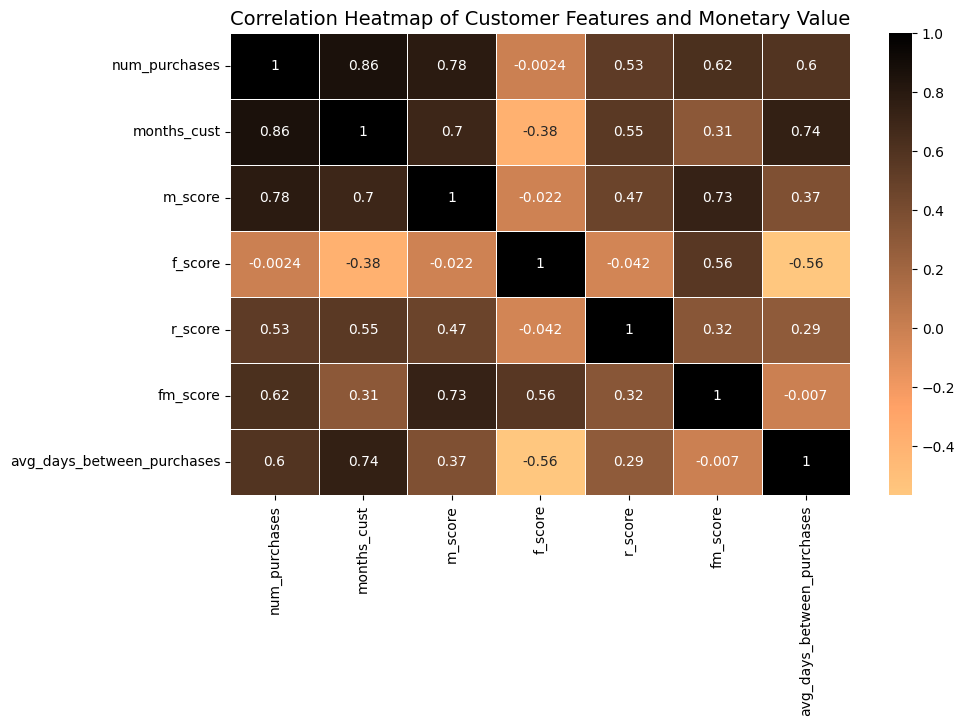

In [ ]:
heatmap_columns = ['num_purchases', 'months_cust', 'm_score',	'f_score',	'r_score',	'fm_score', 'avg_days_between_purchases']

correlation_data = RFM_table[heatmap_columns].corr(method = 'spearman')

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_data, annot=True, cmap='copper_r', linewidths=0.5)

# Set the title for the heatmap
plt.title("Correlation Heatmap of Customer Features and Monetary Value", fontsize=14)
plt.show()

Total number of customers in each RFM_segment as defined

                    rfm_segment  CustomerID
0   Customers Needing Attention        1157
1           Potential Loyalists         957
2                     Champions         596
3                   Hibernating         595
4               Loyal Customers         560
5                       At Risk         294
6                Cant Lose Them         148
7                     Promising          30
8                About to Sleep          14
9              Recent Customers          11
10                         Lost          10
<--------------------------------->


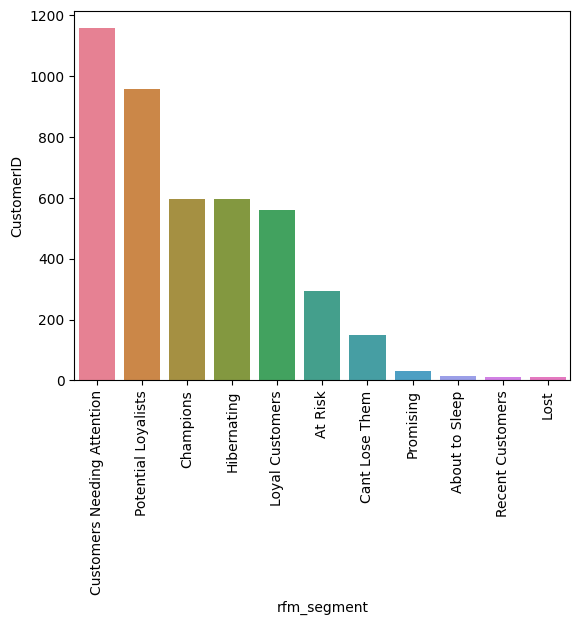

In [ ]:
import warnings
warnings.filterwarnings("ignore")

total_customers_per_segment = RFM_table.groupby('rfm_segment')['CustomerID'].size().sort_values(ascending = False).reset_index()
print(total_customers_per_segment)
print("<--------------------------------->")
sns.barplot(data = total_customers_per_segment, x = 'rfm_segment', y = 'CustomerID', hue = 'rfm_segment')
plt.xticks(rotation = 90)
plt.show()

Total number of customer and sales value for each day

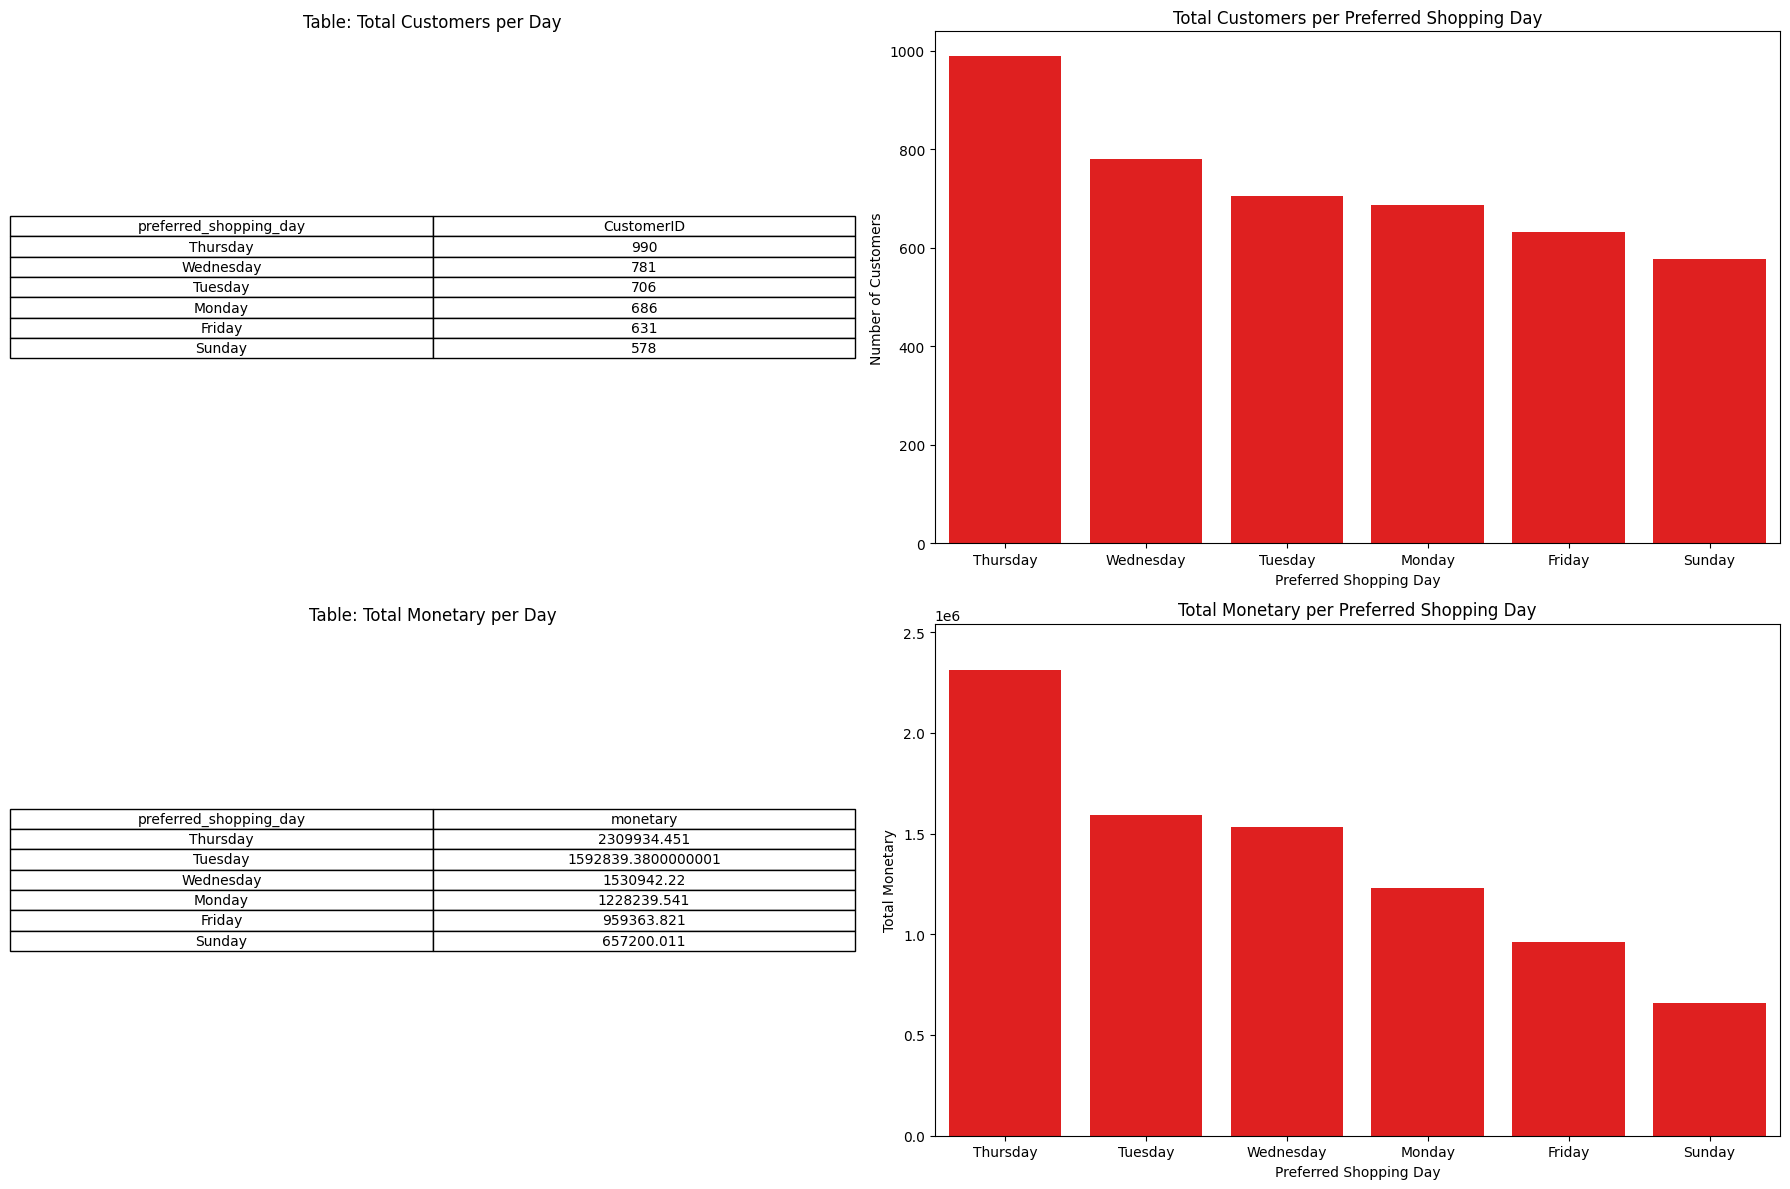

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data
total_customers_per_day = RFM_table.groupby('preferred_shopping_day')['CustomerID'].size().sort_values(ascending=False).reset_index()
total_monetary_per_day = RFM_table.groupby('preferred_shopping_day')['monetary'].sum().sort_values(ascending=False).reset_index()

# Create a figure with larger subplots for side-by-side display
fig, (ax1_table, ax2_table) = plt.subplots(2, 2, figsize=(18, 12))  # Adjust size as needed

# Plot total customers per day
sns.barplot(data=total_customers_per_day, x='preferred_shopping_day', y='CustomerID', color='r', ax=ax1_table[1])
ax1_table[1].set_title('Total Customers per Preferred Shopping Day')
ax1_table[1].set_xlabel('Preferred Shopping Day')
ax1_table[1].set_ylabel('Number of Customers')
ax1_table[1].tick_params(axis='x')  # Rotate x-axis labels for better visibility

# Plot total monetary per day
sns.barplot(data=total_monetary_per_day, x='preferred_shopping_day', y='monetary', color='r', ax=ax2_table[1])
ax2_table[1].set_title('Total Monetary per Preferred Shopping Day')
ax2_table[1].set_xlabel('Preferred Shopping Day')
ax2_table[1].set_ylabel('Total Monetary')
ax2_table[1].tick_params(axis='x')  # Rotate x-axis labels for better visibility

# Set y-axis limits to avoid single-digit display
ax2_table[1].set_ylim(0, total_monetary_per_day['monetary'].max() * 1.1)  # Slightly increase max limit for clarity

# Hide the default y-axis for tables
ax1_table[0].axis('off')
ax2_table[0].axis('off')

# Add tables above the plots
table1 = ax1_table[0].table(cellText=total_customers_per_day.values, colLabels=total_customers_per_day.columns, loc='center', cellLoc='center')
ax1_table[0].set_title('Table: Total Customers per Day', pad=0.5)  # Adjust pad for closer title
table1.set_fontsize(10)  # Set font size for the table

table2 = ax2_table[0].table(cellText=total_monetary_per_day.values, colLabels=total_monetary_per_day.columns, loc='center', cellLoc='center')
ax2_table[0].set_title('Table: Total Monetary per Day', pad=0.5)  # Adjust pad for closer title
table2.set_fontsize(10)  # Set font size for the table

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Peak Shopping Hours: Customer Frequency Distribution

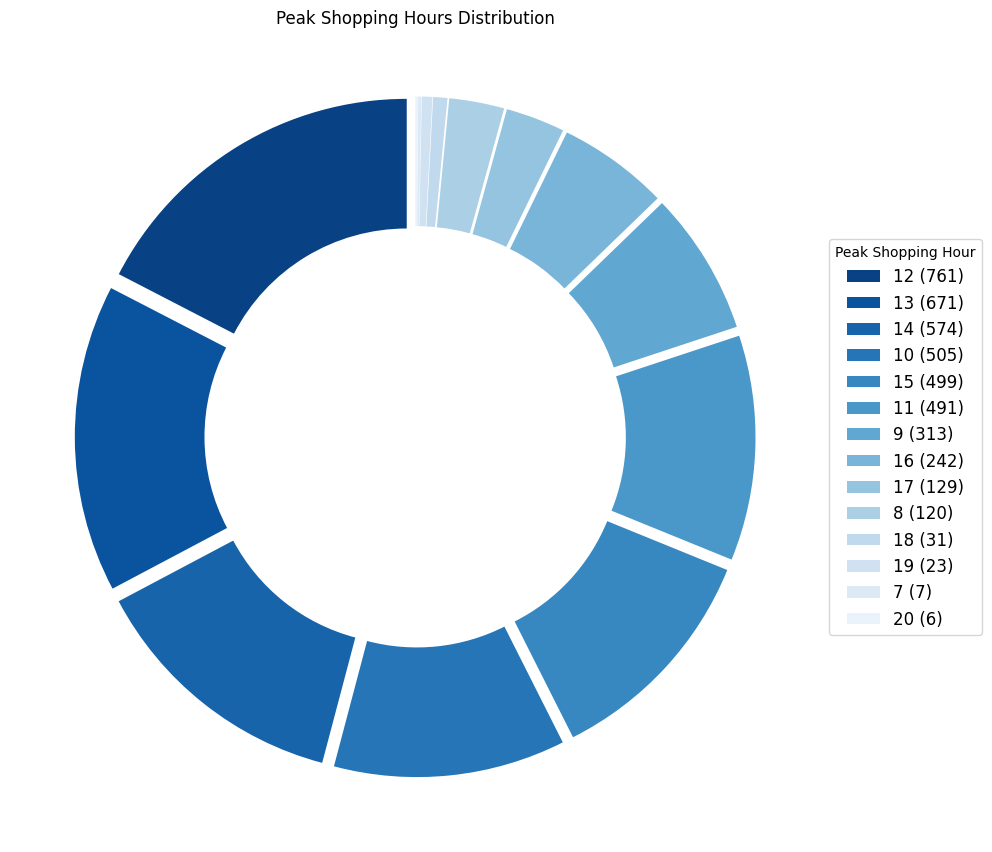

In [ ]:
# Create a DataFrame for peak shopping hours distribution
peak_hrs_distribution = RFM_table['peak_shopping_hr'].value_counts().reset_index()
peak_hrs_distribution.columns = ['peak_shopping_hr', 'count']  # Rename the columns for clarity

# Sort the DataFrame by count in descending order
peak_hrs_distribution = peak_hrs_distribution.sort_values(by='count', ascending=False)

# Define explode to slightly separate each slice
explode = [0.05] * len(peak_hrs_distribution)  # Slightly "explode" each slice for better clarity

# Create a color palette where higher values get brighter colors
colors = sns.color_palette("Blues", n_colors=len(peak_hrs_distribution))

# Reverse the color palette to assign brighter colors to larger values
colors = colors[::-1]  # Reverse the order of colors

# Plot the pie chart without labels
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(peak_hrs_distribution['count'],
                         explode=explode,
                         startangle=90,
                         colors=colors,  # Use the reversed color palette
                         wedgeprops=dict(width=0.4))

# Combine the peak shopping hours with their counts as strings
legend_labels = peak_hrs_distribution['peak_shopping_hr'].astype(str) + ' (' + peak_hrs_distribution['count'].astype(str) + ')'

# Add a legend outside the pie chart
plt.legend(wedges,
           legend_labels,  # Use the combined labels
           title="Peak Shopping Hour",
           loc="center left",
           bbox_to_anchor=(1, 0.5),  # Position legend outside the pie chart
           fontsize=12)

plt.title('Peak Shopping Hours Distribution')
plt.tight_layout()
plt.show()


In [ ]:
final_columns = ['CustomerID', 'country', 'm_score',	'f_score',	'r_score',	'fm_score',
                 'rfm_segment',	'preferred_shopping_day',	'peak_shopping_hr',	'avg_days_between_purchases']

RFM_table[final_columns]

,CustomerID,country,m_score,f_score,r_score,fm_score,rfm_segment,preferred_shopping_day,peak_shopping_hr,avg_days_between_purchases
0,12346.0,United Kingdom,1,5,1,3,At Risk,Tuesday,10,0.00
1,12347.0,Iceland,5,2,5,4,Champions,Tuesday,14,2.00
2,12348.0,Finland,4,1,2,2,Customers Needing Attention,Thursday,19,9.40
3,12349.0,Italy,4,3,4,4,Loyal Customers,Monday,9,0.00
4,12350.0,Norway,2,3,1,2,Hibernating,Wednesday,16,0.00
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,United Kingdom,1,3,1,2,Hibernating,Monday,9,0.00
4368,18281.0,United Kingdom,1,3,1,2,Hibernating,Sunday,10,0.00
4369,18282.0,United Kingdom,1,2,5,2,Potential Loyalists,Friday,13,9.83
4370,18283.0,United Kingdom,5,5,5,5,Champions,Thursday,14,0.45


In [5]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/CRM Analysis project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CRM Analysis project.ipynb to pdf
[NbConvertApp] Support files will be in CRM Analysis project_files/
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Making directory ./CRM Analysis project_files
[NbConvertApp] Writing 117400 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 549729 bytes to /content/